In [1]:
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt  
import csv
import random
import math

dataset = []
instances = []
classifiers = []

# Read dataset from CSV
with open('dataset-reduced.csv') as file:
    reader = csv.reader(file, delimiter=',')
    count = 0
    for row in reader:
        if count != 0:
            dataset.append(row)
        count += 1    

# The 250 first rows are positive strokes, so shuffling the array should spred them
random.shuffle(dataset)

for data in dataset:
    # Create instances array, removing the patient id and classifier
    instances.append([data[1], data[2], data[3], data[4], data[5], data[6], data[7], data[8], data[9], data[10]])
    # Create classifiers array. The index for each item here corresponds to each item on the instances array
    classifiers.append(data[11])

# Use 80% of the dataset as training data
training_amount = math.floor(len(dataset) * 0.8)

# Split dataset into training and testing arrays

# Training arrays - Get instances from 0 up to the training amount
training_dataset = instances[:training_amount]
training_classifiers = classifiers[:training_amount]

# Testing arrays - Get instances from the training amount up to the end
test_dataset = instances[training_amount:]
test_dataset_complete = dataset[training_amount:]
test_classifiers = classifiers[training_amount:]

print(f'Dataset size: {len(dataset)}')
print(f'Training dataset size: {len(training_dataset)}')
print(f'Testing dataset size: {len(test_dataset)}')

Dataset size: 499
Training dataset size: 399
Testing dataset size: 100


In [2]:
from sklearn.preprocessing import OneHotEncoder

# Sklearn's Decision Tree Classifier cannot handle categorical data by default
# So we can use OneHotEncoder to work around that
# Check this: https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree/56857255#56857255
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(instances)

# Transform categorical data into numbers
training_dataset_transformed = enc.transform(training_dataset).toarray()
test_dataset_transformed = enc.transform(test_dataset).toarray()

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_dataset_transformed, training_classifiers)
predictions = clf.predict(test_dataset_transformed)

print(f'Accuracy: {clf.score(test_dataset_transformed, test_classifiers)}')

# Print every patient with stroke = 1 and the model prediction
# for x in range(len(test_dataset_complete)):
#     if test_dataset_complete[x][11] == '1':
#         print(f'ID: {test_dataset_complete[x][0]} Stroke: {test_dataset_complete[x][11]} Prediction: {predictions[x]}')

Accuracy: 0.76


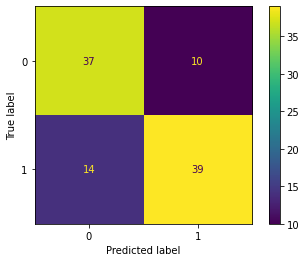

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        51
           1       0.74      0.80      0.76        49

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100



In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix
plot_confusion_matrix(clf, test_dataset_transformed, test_classifiers)  
plt.show()
print(classification_report(predictions, test_classifiers))